# Artificial neural network for Water Distribution Systems Metamodelling - Machine learning project (1/2)

### ☑ <font color='#0096FF'>Blue-tape list<font><a class='anchor' id='top'></a>

 <font color='#0096FF'>
<!-- <div style="background-color:#AABAB2; vertical-align: middle; padding:3px 20px;"> -->

- Define more specific objectives
- Explain what is a metamodel 
- Check dependencies
- Renormalize without considering the reservoirs
- Add the ML Development cycle image

**Objectives:**
- Implement an artificial neural network (ANN) to metamodel a water distribution system.

**Completition requirements:**

By the end of this notebook, you should have:
- Implemented all the code cells for:
  - Loading the dataset of simulations
  - Defining an ANN
  - Training the ANN
  - Testing the performance of the ANN
  - Saving the metamodel for later use
- Answered all the questions

## 📔 Libraries

<!-- 
# If you have not installed pytorch geometric uncomment the following lines to install it

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# !pip install wntr -->

To run this notebook you need to have installed the following packages:
- Pandas
- Numpy
- Matplotlib
- Pickle
- Scikit-learn

In [3]:
import time
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

## 🔙 Background

### 💧 Water distribution systems

Water utilities rely on hydrodynamic models to properly design and control water distribution systems (WDSs). These physically-based models, such as [EPANET](https://www.epa.gov/water-research/epanet), compute the state of the system, i.e., the flow rates and pressures at all the pipes and junctions, as illustrated in Figure 1. 

Hydrodynamic models provide valuable insight into the functioning of the system. However, the computational speed of these models is often insufficient for some applications in civil engineering such as optimisation of design or criticality assessment, especially in large search space problems. 

One alternative to address this issue is developing data-driven models. These models are trained using results calculated using the original model (EPANET, in this case) in multiple scenarios. The objective of the data-driven models is to estimate the output of the original model but in a shorter time.

### 🖥Numerical model

Metamodels

### 🤖Artificial Neural Network (ANN)

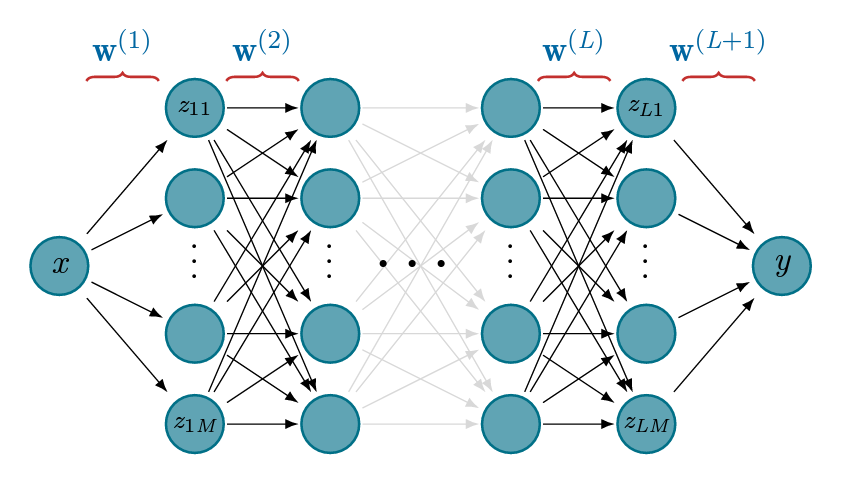
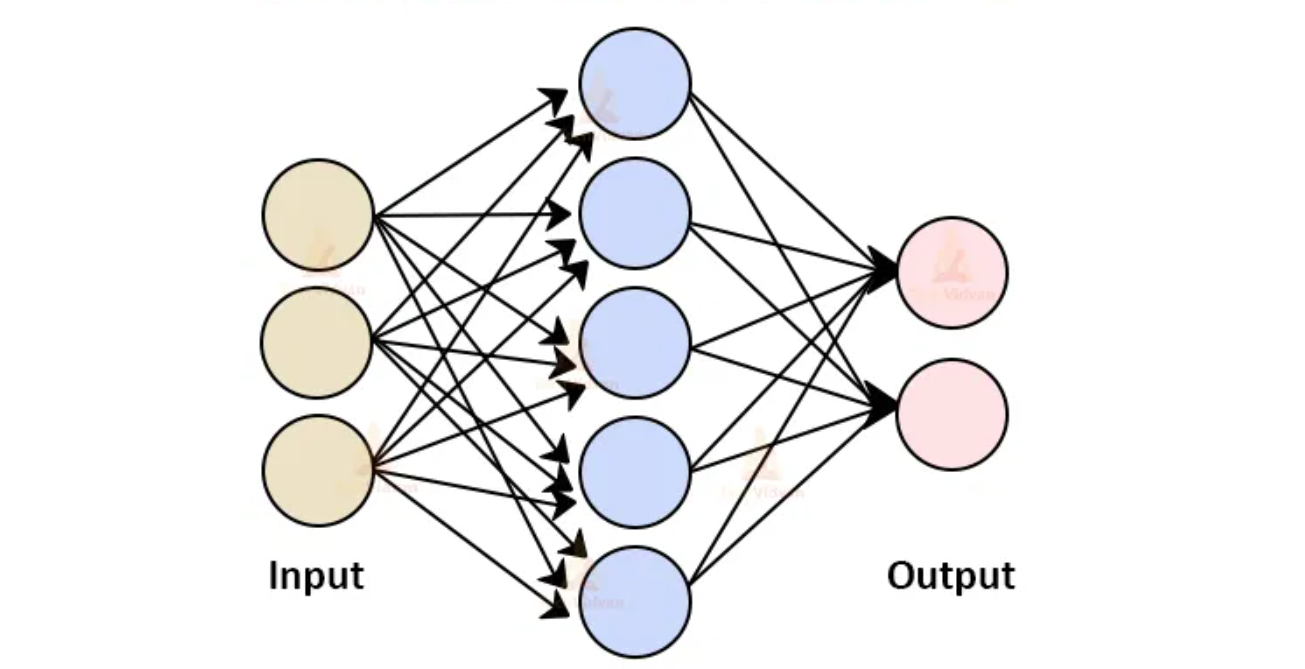

## ⛔ Problem definition 

The problem is to create an alternative model of WNTR using an ANN. The metamodel should give approximate solution while being faster to run. 


ML development cycle

## 🏋🏽‍♀️ Exercise: Metamodel

### 1. Load the database of examples

Training

In [4]:
file_path = r"./Datasets/Modena/features_Modena_training.p"
with open(file_path, 'rb') as handle:
    training_features = pickle.load(handle)

file_path = r"./Datasets/Modena/targets_Modena_training.p"
with open(file_path, 'rb') as handle:
    training_targets = pickle.load(handle)

Validation

In [5]:
file_path = r"./Datasets/Modena/features_Modena_validation.p"
with open(file_path, 'rb') as handle:
    validation_features = pickle.load(handle)

file_path = r"./Datasets/Modena/targets_Modena_validation.p"
with open(file_path, 'rb') as handle:
    validation_targets = pickle.load(handle)

### 2. Data pre-processing

In [10]:
# set up scalers and scale data
xscaler, yscaler = StandardScaler(), StandardScaler()
xit = xscaler.inverse_transform
yit = yscaler.inverse_transform
X_train, y_val = xscaler.fit_transform(training_features), yscaler.fit_transform(training_targets).reshape(-1)

X_val, y_val = xscaler.transform(validation_features), yscaler.transform(validation_targets)

# Run the function you created

# X_train, X_val, X_test, y_train, y_val, y_test, _, _, idcs_test = train_test_val_split(X,y, test_size=0.2, val_size=0.2)

In [11]:
# max_feature = features.max()
# min_feature = features.min()

max_target = training_targets.max()
min_target = training_targets.min()

In [12]:
normalized_training_targets   = (training_targets - min_target)/(max_target-min_target)
normalized_validation_targets = (validation_targets - min_target)/(max_target-min_target)

In [13]:
validation_targets.shape

(1000, 272)

### 3. Create batches of training data.

In [8]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [9]:
training_features_tensor = torch.tensor(training_features, dtype = torch.float32)
normalized_training_targets_tensor = torch.tensor(normalized_training_targets, dtype = torch.float32)

validation_features_tensor = torch.tensor(validation_features, dtype = torch.float32)
normalized_validation_targets_tensor = torch.tensor(normalized_validation_targets, dtype = torch.float32)

In [10]:
training_dataset   = CustomDataset(training_features_tensor, normalized_training_targets_tensor)
validation_dataset = CustomDataset(validation_features_tensor, normalized_validation_targets_tensor)

In [11]:
#Prepare the data in batches
batch_size = 256
training_loader   = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)

### 4. Define the metamodel

## Linear Model

First, let's try a linear model with linear features. We use the `MLPRegressor` to stay consistent with the workflow for the rest of the notebook. A linear model with linear features can be obtained by setting the activation function to be the identity. The inputs are multiplied with the weights twice &mdash; once before and once after the hidden layer. However, the linear combination of linear models will still result in a linear model, which makes this little trick work. The training is trivial, and we therefore employ the built-in `MLPRegressor.fit()` function to this end.

In [ ]:
# Set up linear regression model
LinearModel = MLPRegressor(solver='sgd', hidden_layer_sizes=(10), activation='identity', learning_rate='constant')

# train NN
LinearModel.fit(X_train, y_train)
y_pred = LinearModel.predict(X_test)

In [12]:

# Define the fully connected network
class FullyConnectedANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FullyConnectedANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, hidden_size)
        self.fc6 = nn.Linear(hidden_size, output_size)

        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.fc6(x)
        return x


class AverageValue(nn.Module):
    def __init__(self, elevation):
        super(FullyConnectedANN, self).__init__()
        self.elevation= torch.tensor(elevation)
    
    def forward(self, x):

        return self.elevation


# class MLP(nn.Module):
# 	def __init__(self, num_outputs, hid_channels, indices, num_layers=6):
# 		super(MLP, self).__init__()
# 		torch.manual_seed(42)
# 		self.hid_channels = hid_channels
# 		self.indices = indices
# 		self.num_flows = indices[2] - indices[1]

# 		layers = [Linear(indices[4], hid_channels),
# 				  nn.ReLU()]

# 		for l in range(num_layers-1):
# 			layers += [Linear(hid_channels, hid_channels),
# 					   nn.ReLU()]

# 		layers += [Linear(hid_channels, num_outputs)]

# 		self.main = nn.Sequential(*layers)

# 	def forward(self, x):

# 		x = self.main(x)

# 		return x

### 5. Instantiate the ANN

In [19]:
# Define input size, hidden size, and output size
input_size = 317  # 
hidden_size = 128
output_size = 272  # 

# Create an instance of the SimpleFCNN
model = FullyConnectedANN(input_size, hidden_size, output_size)

# Print the model architecture
print(model)


FullyConnectedANN(
  (fc1): Linear(in_features=317, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=128, bias=True)
  (fc6): Linear(in_features=128, out_features=272, bias=True)
  (relu): ReLU()
)


### 6. Train the ANN

Training epoch function

In [15]:
def train_epoch(model, loader, optimizer, device='cpu'):
  """
    Trains a neural network model for one epoch using the specified data loader and optimizer.

    Args:
        model (nn.Module): The neural network model to be trained.
        loader (DataLoader): The PyTorch DataLoader containing the training data.
        optimizer (torch.optim.Optimizer): The PyTorch optimizer used for training the model.
        device (str): The device used for training the model (default: 'cpu').

    Returns:
        float: The mean loss value over all the batches in the DataLoader.

    """
  model.to(device)
  model.train()
  losses = []

  for batch in loader:
      features, targets = batch
      preds = model(features)
      loss = nn.MSELoss()(preds, targets)
      losses.append(loss.cpu().detach())
      
      # Backpropagate and update weights
      loss.backward()
      optimizer.step()
      optimizer.zero_grad(set_to_none=True)

  return np.array(losses).mean()

Evaluating epoch function

In [16]:
def evaluate_epoch(model, loader, device='cpu'):
    """
    Evaluates the performance of a trained neural network model on a dataset using the specified data loader.

    Args:
        model (nn.Module): The trained neural network model to be evaluated.
        loader (DataLoader): The PyTorch DataLoader containing the evaluation data.
        device (str): The device used for evaluating the model (default: 'cpu').

    Returns:
        float: The mean loss value over all the batches in the DataLoader.

    """
    
    model.to(device)
    model.eval() 
    losses = []
    
    with torch.no_grad():
        for batch in loader:
            features, targets = batch
            preds = model(features)

            loss = nn.MSELoss()(preds, targets)
            losses.append(loss.cpu().detach())

    return np.array(losses).mean()

In [17]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


Create optimizer

In [20]:
# Set training parameters
learning_rate = 0.001
num_epochs = 1000

# Create the optimizer to train the neural network via back-propagation
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

Training loop

In [40]:
#create vectors for the training and validation loss
torch.manual_seed(seed = 13)
train_losses = []
val_losses = []
patience = 5       # patience for early stopping

#start measuring time
start_time = time.time()

for epoch in range(1, num_epochs+1):
    # Model training
    train_loss = train_epoch(model, training_loader, optimizer, device=device)

    # Model validation
    val_loss = evaluate_epoch(model, validation_loader, device=device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Early stopping
    try:
        if val_losses[-1]>=val_losses[-2]:
            early_stop += 1
            if early_stop == patience:
                print("Early stopping! Epoch:", epoch)
                break
        else:
            early_stop = 0
    except:
        early_stop = 0

    if epoch%1 == 0:
        print("epoch:",epoch, "\t training loss:", np.round(train_loss,4),
                            "\t validation loss:", np.round(val_loss,4))

elapsed_time = time.time() - start_time
print(f'Model training took {elapsed_time:.3f} seconds')

epoch: 1 	 training loss: 0.0151 	 validation loss: 0.0038
epoch: 2 	 training loss: 0.0013 	 validation loss: 0.0008
epoch: 3 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 4 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 5 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 6 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 7 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 8 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 9 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 10 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 11 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 12 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 13 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 14 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 15 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 16 	 training loss: 0.0008 	 validation loss: 0.0008
epoch: 17 	 training loss: 0.0008 	 validation lo

In the following cell, plot the loss as function of epochs

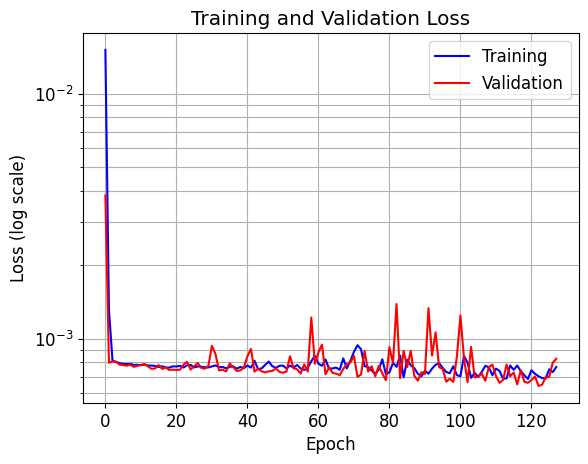

In [41]:
import matplotlib.pyplot as plt

# Set the font size for the plot labels and title
plt.rcParams.update({'font.size': 12})

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the training loss as a blue line
ax.plot(train_losses, 'b-', label='Training')

# Plot the validation loss as a red line
ax.plot(val_losses, 'r-', label='Validation')

# Add a legend to the plot
ax.legend(loc='upper right')

# Set the plot labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (log scale)')
ax.set_yscale('log')
ax.set_title('Training and Validation Loss')

# Add grid lines to the plot
ax.grid(True, which='both')

# Display the plot
plt.show()


### 🕵 <font color='289C4E'>Questions<font><a class='anchor' id='top'></a>

Based on the loss curves:
*   What would you conclude about the overfitting or underfitting capabilities of the model?
*   Is this model adequate to be used? Why?

#### Answers:

*   What would you conclude about the overfitting or underfitting capabilities of the model?

Example:
"Both curves are decreasing, this means that the network is learning. However, the validation curve is below the training curve. This can indicate that the two distributions are different and the validation examples are easier than the training examples."

Other behaviours are explained [here](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/). 

*   Is this model adequate to be used? Why?

The students can argue that the model is learning, it is stabilizing, and the magnitude of the loss is low. Nevertheless, it is desirable that they question this curve and its ability to decide wheather the model is ready to be used or not. Further analysis should be carried out.




### 7. Test the ANN as metamodel

For our application, we need the model to be both accurate and fast. Here, we will test those qualities.

#### Accuracy

Calculate the loss value for the test dataset

In [13]:
file_path = r"./Datasets/Modena/features_Modena_testing.p"
with open(file_path, 'rb') as handle:
    testing_features = pickle.load(handle)

file_path = r"./Datasets/Modena/targets_Modena_testing.p"
with open(file_path, 'rb') as handle:
    testing_targets = pickle.load(handle)

In [21]:
normalized_testing_targets = (testing_targets - min_target)/(max_target - min_target)

testing_features_tensor = torch.tensor(testing_features, dtype = torch.float32)
normalized_testing_targets_tensor = torch.tensor(normalized_testing_targets, dtype = torch.float32)

testing_features_tensor = torch.tensor(testing_features, dtype = torch.float32)
normalized_testing_targets_tensor = torch.tensor(normalized_testing_targets, dtype = torch.float32)


testing_dataset = CustomDataset(testing_features_tensor, normalized_testing_targets_tensor)
testing_loader = DataLoader(testing_dataset, batch_size=len(testing_dataset), shuffle=True)

test_loss = evaluate_epoch(model, testing_loader, device=device)
num_test_sims = len(testing_dataset)

print('Test loss: ', test_loss)
print('Number of test scenarios: ', num_test_sims)

Test loss:  0.6418991
Number of test scenarios:  1000


In [28]:
from sklearn.metrics import r2_score

In [29]:
for batch in testing_loader:
    features, targets = batch
    preds = model(features)
    
    unnormalized_preds   = preds*(max_target - min_target) + min_target
    unnormalized_targets = targets*(max_target - min_target) + min_target
    
    print(r2_score(unnormalized_targets.flatten(), unnormalized_preds.detach().numpy().flatten()))

-39.87218742539528


#### Errors in unnormalized variable

Calculate the error in pressure for all the nodes in all the scenarios. This error matrix should be of shape [Scenarios , Nodes].

Remember that the variables were normalized for training purposes. However, the water utility is interested in the value of the output variable in physical units, in this case, pressure in mH2O. In order to do this, unnormalize the output variable knowing that the maximum and minimum pressures used to normalized the output variable were 59.56 mH2O and 0 mH2O, respectively.

In [63]:
test_estimations = []
target_pressure = []

for batch in testing_loader:
  features, targets = batch

  test_estimations.append(max_target * (model(features)).detach().numpy())
  target_pressure.append(max_target * (targets).numpy())

estimated_pressure = np.vstack(test_estimations)
target_pressure = np.vstack(target_pressure)

error = target_pressure  - estimated_pressure

#### Error in pressure for all scenarios for one node

Plot the error of one node across test scenarios. 

In [64]:
node_ID = 50
error_node = error[:, node_ID]

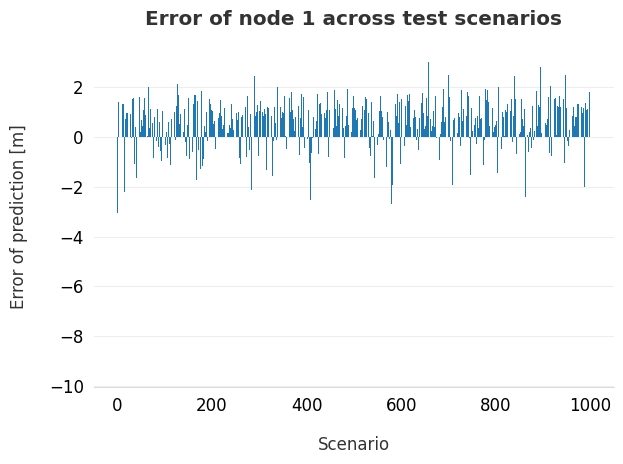

In [65]:
fig, ax = plt.subplots()

bars = ax.bar(
    x=np.arange(error_node.size),
    height=error_node,
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Scenario', labelpad=15, color='#333333')
ax.set_ylabel('Error of prediction [m]', labelpad=15, color='#333333')
ax.set_title(f'Error of node {node_ID} across test scenarios', pad=15, color='#333333', weight='bold')

fig.tight_layout()

### 🕵 <font color='289C4E'>Questions<font><a class='anchor' id='top'></a>

Based on the results accross scenarios:
*   Is the model satisfactorily fitting? 
*   If there are there outliers, do they have any pattern? 
*   Are these errors considerable?



#### Answers:

Based on the results accross scenarios:
*   Is the model satisfactorily fitting? 

The model seem to be performing adequately for most of the scenarios. However, there are some outliers that are worrying. These have errors of around 80%. The criteria to use this model or not, depends on the application and the people who would use it. The decision should be consulted with the water utility.

*   If there are there outliers, do they have any pattern? 

In order to answer this question, the students can analyse the outliers in the following part of the code. Most likely there won't be any noticeable patterns. These would be related to the hydraulic scenarios; for example, if the diameter of the pipe that connects the reservoir is too small it can cause an impact in the entire network, this case would be hard to detect with a data driven model without any physical constraints. 

*   Are these errors considerable?

Yes. Considering that the maximum pressure is around 60 mH2O; these errors are significant.



#### Error of all nodes in one scenario

Plot the error of all the nodes of one scenario. 

In [66]:
sim_ID = 3
error_sim = error[sim_ID, :]

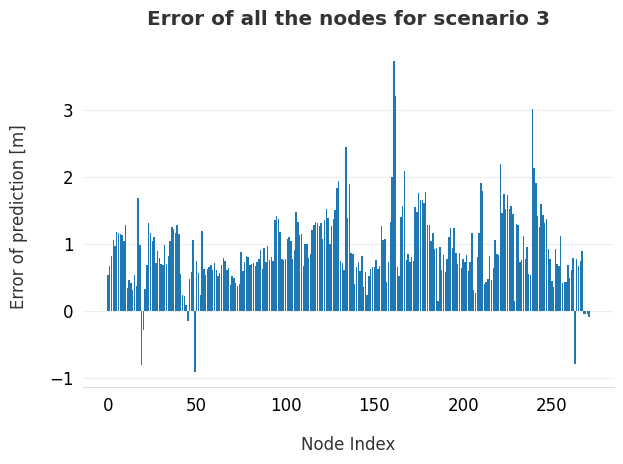

In [67]:
fig, ax = plt.subplots()

bars = ax.bar(
    x=np.arange(error_sim.size),
    height=error_sim,
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Node Index', labelpad=15, color='#333333')
ax.set_ylabel('Error of prediction [m]', labelpad=15, color='#333333')
ax.set_title(f'Error of all the nodes for scenario {sim_ID}', pad=15, color='#333333', weight='bold')

fig.tight_layout()

### 🕵 <font color='289C4E'>Questions<font><a class='anchor' id='top'></a>

Based on this error analysis:
*   How does it compare with the previous error analysis?
*   Is the model over- or under- predicting?
*   Would you recommend the water utility to use this model?
    *   Does your recommendation match with your previous recommendation?

#### Answers:

Based on this error analysis:
*   How does it compare with the previous error analysis?

This error analysis shows what is expected if the model is used for a single scenario. 

*   Is the model over- or under- predicting?

The error in one scenario indicates that the model is underpredicting for some nodes, but mostly, it is overpredicting. The simulations of the outliers show consistent errors across all nodes.The shape of the error curves, looks very similar, this indicates that the nodes are consistently being over(or under) predicted.

*   Would you recommend the water utility to use this model?
    *   Does your recommendation match with your previous recommendation?


Based on these results, the model could be recommendeded with some precautions. It is for the water utility to indicate if the expected error and the outliers are acceptable for the application they have in mind.



### Speed

We can calculate the time per scenario that the model takes.

In [68]:
start_time = time.time()
for batch in testing_loader:
  features, targets = batch
  model(features)
total_time = time.time() - start_time

data_driven_exec_time_per_sim = total_time/num_test_sims
print(f'Data-driven model took {data_driven_exec_time_per_sim:.5f} seconds for {num_test_sims} scenarios')

Data-driven model took 0.00002 seconds for 1000 scenarios


Considering that the original model can take up to 0.04 seconds per scenario, we can estimate the potential gain in speed-up. (Speed-up = original_time/Data-driven_model_time)

In [69]:
original_time_per_sim = 0.04

speed_up = np.round(original_time_per_sim/data_driven_exec_time_per_sim, 2)
print('The data-driven model is', speed_up,'times faster than EPANET per scenario.')

The data-driven model is 1718.36 times faster than EPANET per scenario.


### 🕵 <font color='289C4E'>Questions<font><a class='anchor' id='top'></a>

Based on the results on speed:
*   Which factors or components could make the model faster or slower on its execution?



#### Answers:

Some components increase the computational burden on the model. These include: Number of layers, number of hidden units, number of k-hops. 



### 8. Save the metamodel

In [70]:
with open('model.p', 'wb') as handle:
    pickle.dump(model, handle)

In [71]:
torch.save(model.state_dict(), 'model_weights.pt')